In [64]:
## Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
## Importing the dataset
url="https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv"
s=requests.get(url).content
df=pd.read_csv(url)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [67]:
df.shape

(2906, 24)

In [68]:
df.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2                      0                           1.0   
3                      0                           1.0   
4                      0                           1.0   

   btc_median_confirmation_time  btc_hash_rate  btc_difficulty  \
0                           0.0       0.000029        2.527738   
1                           0.0       0.000029        2.527738   
2                           0.0       0.000023        2.527738   
3                           0.0       0.000028        2.527738   
4                           0.0       0.000027        2.527738   

   btc_miners_revenue  btc_transaction_fees  btc_cost_per_transaction_percent  \
0                 0.0                   0.0                         31.781022   
1                 0.0                   0.0                        154.463801   
2                 0.0                   0.0                       1278.516635   
3                 0.0                   0.0                      22186.687990   
4                 0.0                   0.0                        689.179876   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                     241                 244   
1                       0.0                     234                 235   
2                       0.0                     185                 183   
3                       0.0                     224                 224   
4                       0.0                     218                 218   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                     41240                                   244   
1                     41475                                   235   
2                     41658                                   183   
3                     41882                                   224   
4                     42100                                   218   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                                244             65173.13   
1                                                235             18911.74   
2                                                183              9749.98   
3                                                224             11150.03   
4                                                218             12266.83   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                           36500.0                                   0.0  
1                            7413.0                                   0.0  
2                             700.0                                   0.0  
3                              50.0                                   0.0  
4                            1553.0                                   0.0

## Changing the datatype of Date column so that it is recognised by linear regression model

In [69]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [70]:
df['Date']

0       733820
1       733821
2       733822
3       733823
4       733824
5       733825
6       733826
7       733827
8       733828
9       733829
10      733830
11      733831
12      733832
13      733833
14      733834
15      733835
16      733836
17      733837
18      733838
19      733839
20      733840
21      733841
22      733842
23      733843
24      733844
25      733845
26      733846
27      733847
28      733848
29      733849
30      733850
31      733851
32      733852
33      733853
34      733854
35      733855
36      733856
37      733857
38      733858
39      733859
40      733860
41      733861
42      733862
43      733863
44      733864
45      733865
46      733866
47      733867
48      733868
49      733869
50      733870
51      733871
52      733872
53      733873
54      733874
55      733875
56      733876
57      733877
58      733878
59      733879
60      733880
61      733881
62      733882
63      733883
64      733884
65      733885
66      73

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   int64  
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [72]:
df['btc_market_price'].iloc[1023]

13.6888

## Vizualization

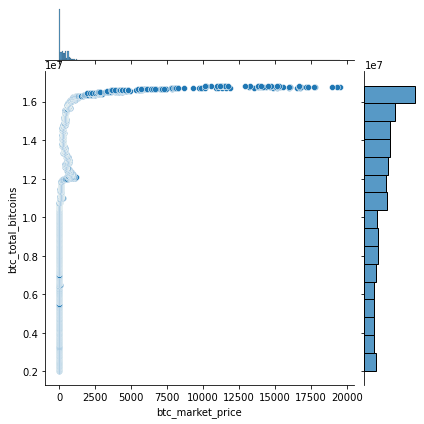

In [73]:
sns.jointplot(x='btc_market_price',y = 'btc_total_bitcoins', data=df)

In [74]:
df.corr()

Date  \
Date                                                1.000000   
btc_market_price                                    0.492200   
btc_total_bitcoins                                  0.975504   
btc_market_cap                                      0.485678   
btc_trade_volume                                    0.366356   
btc_blocks_size                                     0.892470   
btc_avg_block_size                                  0.935922   
btc_n_orphaned_blocks                               0.241876   
btc_n_transactions_per_block                        0.916324   
btc_median_confirmation_time                        0.630002   
btc_hash_rate                                       0.611443   
btc_difficulty                                      0.622807   
btc_miners_revenue                                  0.470254   
btc_transaction_fees                                0.571569   
btc_cost_per_transaction_percent                   -0.061940   
btc_cost_per_transaction                            0.405414   
btc_n_unique_addresses                              0.915336   
btc_n_transactions                                  0.917690   
btc_n_transactions_total                            0.894205   
btc_n_transactions_excluding_popular                0.907824   
btc_n_transactions_excluding_chains_longer_than...  0.896358   
btc_output_volume                                   0.284489   
btc_estimated_transaction_volume                    0.198865   
btc_estimated_transaction_volume_usd                0.488647   

                                                    btc_market_price  \
Date                                                        0.492200   
btc_market_price                                            1.000000   
btc_total_bitcoins                                          0.392474   
btc_market_cap                                              0.999783   
btc_trade_volume                                            0.868813   
btc_blocks_size                                             0.674507   
btc_avg_block_size                                          0.544033   
btc_n_orphaned_blocks                                      -0.076400   
btc_n_transactions_per_block                                0.544125   
btc_median_confirmation_time                                0.275250   
btc_hash_rate                                               0.920876   
btc_difficulty                                              0.916937   
btc_miners_revenue                                          0.986732   
btc_transaction_fees                                        0.806595   
btc_cost_per_transaction_percent                           -0.013517   
btc_cost_per_transaction                                    0.815507   
btc_n_unique_addresses                                      0.663917   
btc_n_transactions                                          0.569603   
btc_n_transactions_total                                    0.680048   
btc_n_transactions_excluding_popular                        0.558416   
btc_n_transactions_excluding_chains_longer_than...          0.567281   
btc_output_volume                                           0.111734   
btc_estimated_transaction_volume                            0.050894   
btc_estimated_transaction_volume_usd                        0.968308   

                                                    btc_total_bitcoins  \
Date                                                          0.975504   
btc_market_price                                              0.392474   
btc_total_bitcoins                                            1.000000   
btc_market_cap                                                0.384568   
btc_trade_volume                                              0.285815   
btc_blocks_size                                               0.779705   
btc_avg_block_size                                            0.851554   
btc_n_orphaned_blocks                                         

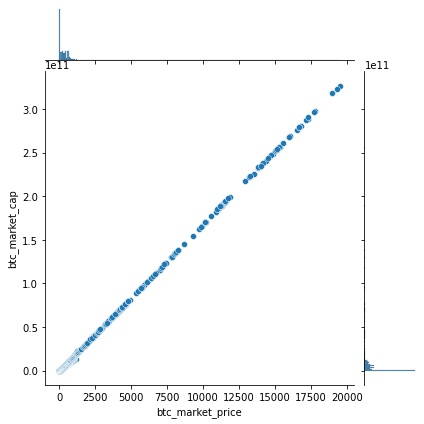

In [75]:
sns.jointplot(x='btc_market_price',y ='btc_market_cap', data=df)

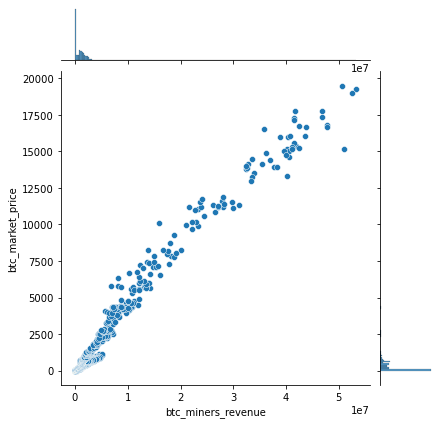

In [76]:
sns.jointplot(x='btc_miners_revenue',y ='btc_market_price', data=df)

## Checking Missing values

In [77]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

(array([159., 156., 151., 184., 200., 250., 332., 376., 394., 677.]),
 array([ 2043200.  ,  3522648.75,  5002097.5 ,  6481546.25,  7960995.  ,
         9440443.75, 10919892.5 , 12399341.25, 13878790.  , 15358238.75,
        16837687.5 ]),
 <BarContainer object of 10 artists>)

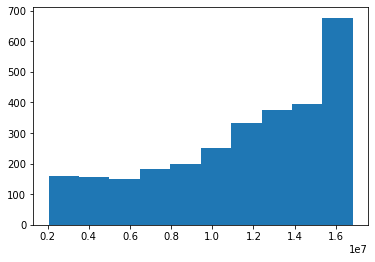

In [78]:
plt.hist(x='btc_total_bitcoins',data=df)

## Imputing mean into missing values.

In [79]:
df['btc_total_bitcoins'].mean()

11511375.720736368

In [80]:
df['btc_total_bitcoins'].fillna(value=11511375.720736368,inplace=True)

In [26]:
df['btc_trade_volume'].fillna(value=df['btc_trade_volume'].mean(),inplace=True)

In [27]:
df['btc_blocks_size'].fillna(value=df['btc_blocks_size'].mean(),inplace=True)

In [29]:
df['btc_median_confirmation_time'].fillna(value=df['btc_median_confirmation_time'].mean(),inplace=True)
df['btc_difficulty'].fillna(value=df['btc_difficulty'].mean(),inplace=True)
df['btc_transaction_fees'].fillna(value=df['btc_transaction_fees'].mean(),inplace=True)

In [30]:
df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

## Splitting the variables for model building

In [31]:
X = df.drop(columns=['btc_market_price'])
Y = df['btc_market_price']

In [32]:
X

Date  btc_total_bitcoins  btc_market_cap   btc_trade_volume  \
0     733820        2.043200e+06    0.000000e+00                  0   
1     733821        2.054650e+06    0.000000e+00                  0   
2     733822        2.063600e+06    0.000000e+00                  0   
3     733823        2.074700e+06    0.000000e+00                  0   
4     733824        2.085400e+06    0.000000e+00                  0   
5     733825        2.098150e+06    0.000000e+00                  0   
6     733826        2.110700e+06    0.000000e+00                  0   
7     733827        2.120200e+06    0.000000e+00                  0   
8     733828        2.127600e+06    0.000000e+00                  0   
9     733829        2.136100e+06    0.000000e+00                  0   
10    733830        2.144750e+06    0.000000e+00                  0   
11    733831        2.152850e+06    0.000000e+00                  0   
12    733832        2.162150e+06    0.000000e+00                  0   
13    733833        2.171950e+06    0.000000e+00                  0   
14    733834        2.179350e+06    0.000000e+00                  0   
15    733835        2.188450e+06    0.000000e+00                  0   
16    733836        2.197200e+06    0.000000e+00                  0   
17    733837        2.206350e+06    0.000000e+00                  0   
18    733838        2.215000e+06    0.000000e+00                  0   
19    733839        2.221800e+06    0.000000e+00                  0   
20    733840        2.229200e+06    0.000000e+00                  0   
21    733841        2.236650e+06    0.000000e+00                  0   
22    733842        2.243950e+06    0.000000e+00                  0   
23    733843        2.249850e+06    0.000000e+00                  0   
24    733844        2.257750e+06    0.000000e+00                  0   
25    733845        2.264000e+06    0.000000e+00                  0   
26    733846        2.270200e+06    0.000000e+00                  0   
27    733847        2.277000e+06    0.000000e+00                  0   
28    733848        2.283150e+06    0.000000e+00                  0   
29    733849        2.290950e+06    0.000000e+00                  0   
30    733850        2.297600e+06    0.000000e+00                  0   
31    733851        2.307250e+06    0.000000e+00                  0   
32    733852        2.316300e+06    0.000000e+00                  0   
33    733853        2.325150e+06    0.000000e+00                  0   
34    733854        2.335400e+06    0.000000e+00                  0   
35    733855        2.344100e+06    0.000000e+00                  0   
36    733856        2.353400e+06    0.000000e+00                  0   
37    733857        2.363150e+06    0.000000e+00                  0   
38    733858        2.371850e+06    0.000000e+00                  0   
39    733859        2.381550e+06    0.000000e+00                  0   
40    733860        2.391150e+06    0.000000e+00                  0   
41    733861        2.401700e+06    0.000000e+00                  0   
42    733862        2.412050e+06    0.000000e+00                  0   
43    733863        2.421500e+06    0.000000e+00                  0   
44    733864        2.428900e+06    0.000000e+00                  0   
45    733865        2.437200e+06    0.000000e+00                  0   
46    733866        2.445500e+06    0.000000e+00                  0   
47    733867        2.453800e+06    0.000000e+00                  0   
48    733868        2.461050e+06    0.000000e+00                  0   
49    733869        2.470700e+06    0.000000e+00                  0   
50    733870        2.480450e+06    0.000000e+00                  0   
51    733871        2.489300e+06    0.000000e+00                  0   
52    733872        2.501300e+06    0.000000e+00                  0   
53    733873        2.513250e+06    0.000000e+00                  0   
54    733874        2.524100e+06    0.000000e+00                  0   
55    733875        2.532350e+06

In [33]:
Y

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
5           0.000000
6           0.000000
7           0.000000
8           0.000000
9           0.000000
10          0.000000
11          0.000000
12          0.000000
13          0.000000
14          0.000000
15          0.000000
16          0.000000
17          0.000000
18          0.000000
19          0.000000
20          0.000000
21          0.000000
22          0.000000
23          0.000000
24          0.000000
25          0.000000
26          0.000000
27          0.000000
28          0.000000
29          0.000000
30          0.000000
31          0.000000
32          0.000000
33          0.000000
34          0.000000
35          0.000000
36          0.000000
37          0.000000
38          0.000000
39          0.000000
40          0.000000
41          0.000000
42          0.000000
43          0.000000
44          0.000000
45          0.000000
46          0.000000
47          0

## Splitting the data into train and test

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=.7, random_state=0)

In [35]:
X_train

Date  btc_total_bitcoins  btc_market_cap   btc_trade_volume  \
453   734273        6.220050e+06    5.287042e+07             342979   
906   734726        9.670350e+06    1.121556e+08             266732   
1831  735651        1.386755e+07    3.272742e+09        1.67381e+07   
700   734520        8.139600e+06    5.657022e+07        1.35964e+06   
2110  735930        1.489400e+07    5.270689e+09        2.16349e+07   
710   734530        8.213000e+06    4.720956e+07             504364   
2419  736239        1.590726e+07    9.698340e+09        9.08702e+06   
855   734675        9.280450e+06    6.310706e+07             366721   
966   734786        1.013500e+07    1.231402e+08             409820   
1482  735302        1.249758e+07    7.773367e+09        2.05391e+07   
1448  735268        1.235398e+07    9.994983e+09        1.66066e+07   
713   734533        8.237350e+06    4.654103e+07             271882   
2832  736652        1.668942e+07    1.340000e+11        5.41744e+08   
2703  736523        1.644641e+07    3.872774e+10        1.06346e+08   
1950  735770        1.429792e+07    3.466818e+09        6.60684e+06   
2043  735863        1.464130e+07    3.359153e+09        1.92337e+07   
958   734778        1.007765e+07    1.298001e+08             813597   
2038  735858        1.462410e+07    3.422039e+09        1.43295e+07   
2294  736114        1.560325e+07    8.194047e+09         4.1188e+07   
1038  734858        1.057630e+07    1.443401e+08             417827   
1127  734947        1.092442e+07    6.927142e+08        6.53252e+06   
2245  736065        1.542048e+07    6.487240e+09        1.57968e+07   
2202  736022        1.526090e+07    6.615142e+09        2.21845e+07   
52    733872        2.501300e+06    0.000000e+00                  0   
1521  735341        1.266282e+07    6.077903e+09        1.55356e+07   
1825  735645        1.384418e+07    3.265287e+09        2.42798e+07   
1657  735477        1.321590e+07    6.377861e+09        1.03287e+07   
20    733840        2.229200e+06    0.000000e+00                  0   
1303  735123        1.168932e+07    1.501494e+09        5.19193e+06   
1237  735057        1.138798e+07    8.841624e+08        6.56553e+06   
962   734782        1.010515e+07    1.303563e+08             343806   
194   734014        3.861450e+06    2.664400e+05            2051.59   
189   734009        3.817850e+06    2.538870e+05            296.022   
1139  734959        1.097930e+07    1.125488e+09         1.0645e+07   
1571  735391        1.286718e+07    8.418993e+09        1.20867e+07   
322   734142        5.059050e+06    1.512646e+06            107.148   
2567  736387        1.618808e+07    1.932532e+10        3.92263e+07   
634   734454        7.656850e+06    2.372858e+07              29341   
264   734084        4.526100e+06    1.674657e+06            37825.2   
1489  735309        1.252645e+07    7.825273e+09        1.12008e+07   
1424  735244        1.224850e+07    1.092382e+10        3.43839e+07   
2102  735922        1.486212e+07    4.765095e+09        3.58626e+07   
476   734296        6.471200e+06    2.064953e+08        2.85921e+06   
1341  735161        1.187290e+07    1.967458e+09        1.24849e+07   
609   734429        7.495800e+06    1.986380e+07             233654   
1334  735154        1.183510e+07    1.535486e+09        1.04516e+07   
1989  735809        1.444152e+07    4.152805e+09        1.32609e+07   
1572  735392        1.287092e+07    8.391843e+09         6.0168e+06   
1411  735231        1.218972e+07    8.713094e+09        2.31184e+07   
2315  736135        1.568190e+07    1.166577e+10        3.62074e+07   
579   734399        7.301800e+06    4.089008e+07             278333   
1224  735044        1.133195e+07    1.177012e+09        1.07658e+07   
993   734813        1.033780e+07    1.125783e+08             363454   
48    733868        2.461050e+06    0.000000e+00                  0   
2759  736579        1.655108e+07    7.703960e+10        2.22545e+08   
1773  735593        1.365065e+07

In [36]:
Y_train

453         8.500000
906        11.597880
1831      236.000000
700         6.950000
2110      353.880000
710         5.748150
2419      610.518913
855         6.800000
966        12.150000
1482      621.990000
1448      809.050000
713         5.650000
2832     8007.654067
2703     2354.783417
1950      242.470000
2043      229.430000
958        12.880000
2038      234.000000
2294      525.150000
1038       13.647500
1127       63.409670
2245      420.690000
2202      433.470000
52          0.000000
1521      479.980000
1825      235.860000
1657      482.590000
20          0.000000
1303      128.450000
1237       77.640000
962        12.899990
194         0.069000
189         0.066500
1139      102.510010
1571      654.300000
322         0.298998
2567     1190.751950
634         3.099000
264         0.370000
1489      624.700000
1424      891.850000
2102      320.620000
476        31.909900
1341      165.710000
609         2.649990
1334      129.740000
1989      287.560000
1572      652

## Importing the model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,Y_train)

LinearRegression()

In [40]:
Y_pred = model.predict(X_test)

In [41]:
Y_pred

array([ 1.07716719e+01,  2.80918728e+02,  1.07761307e+02,  4.49043524e+02,
        1.17545870e+01,  4.22305368e+01, -2.63133470e+00,  2.49746801e+03,
        8.01807603e+02,  1.21418455e+01,  2.12094134e+01, -4.04766291e+00,
        5.49312827e+03,  1.09674996e+01, -6.23715122e+00,  1.40677703e+01,
        2.24039360e+01,  2.97999570e+02,  8.83545793e+02,  6.56412818e+01,
       -8.73573081e+00,  8.31798284e+01,  2.61689799e+02,  4.55395783e-01,
       -2.25323381e+00, -9.75078429e+00,  1.30269325e+01,  8.19491331e+00,
        6.44175783e+02, -6.41153106e+00,  1.00785630e+01,  6.32088726e+00,
        4.13653238e+01,  2.75612254e+00,  2.08717426e+02,  1.02700137e+03,
        4.22552559e+02,  4.37670778e+02,  2.49591784e+02,  1.13484687e+02,
        6.04736939e+02,  1.24610575e+02,  2.37471992e+01,  5.37147218e+02,
        1.86738221e+01,  6.40963638e+02,  3.32878123e+02,  2.77289166e+02,
        3.09720453e+00,  5.17094316e+02, -9.75868778e+00,  4.58572416e+03,
        1.72136479e+04,  

In [58]:
model.coef_

array([ 1.47625372e-02, -2.99421323e-06,  5.84023412e-08, -1.32616139e-09,
       -1.81876606e-04, -4.50165529e+01, -3.54086869e-01, -3.04720348e-02,
        1.01579153e+00, -1.73584071e-05,  2.84858492e-11, -3.29169300e-06,
       -7.29932757e-02,  1.39019047e-04,  3.55638076e+00,  1.32927261e-04,
        4.43508263e-04,  4.01437240e-07, -3.31610832e-04,  1.35394566e-04,
       -4.93122138e-07, -2.24488793e-06,  3.30729487e-08])

In [59]:
model.intercept_

-10835.427898967697

In [42]:
from sklearn import metrics

In [43]:
mse = metrics.mean_squared_error(Y_test,Y_pred)

In [44]:
print(mse)

376.09979560695194


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='btc_market_price', ylabel='Density'>

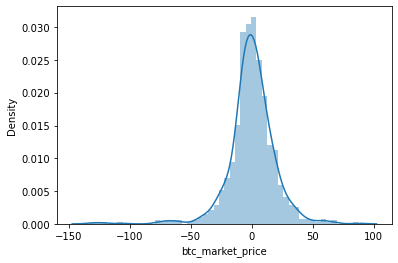

In [45]:
sns.distplot(Y_pred-Y_test)

<AxesSubplot:ylabel='btc_market_price'>

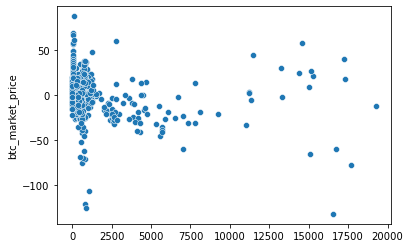

In [46]:
sns.scatterplot(x=Y_pred,y=Y_pred-Y_test)

In [47]:
list_values = [i for i in range(0,len(Y_test))]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual(blue) Vs Predicted (Red)')

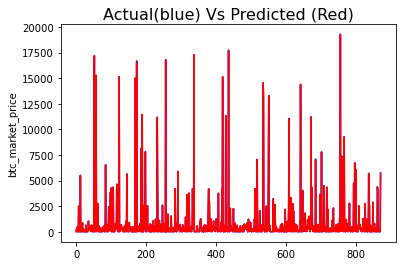

In [48]:
sns.lineplot(list_values,Y_test,color = 'blue')
sns.lineplot(list_values,Y_pred,color = 'red')
plt.title('Actual(blue) Vs Predicted (Red)',fontsize=16)

In [50]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [52]:
stats_model = sm.OLS(Y_train,X_train_sm.astype(float)).fit()

In [60]:
stats_model.params

const                                                  1.400283e-02
Date                                                  -8.082814e-06
btc_total_bitcoins                                    -1.365047e-06
btc_market_cap                                         5.835891e-08
btc_trade_volume                                      -7.275366e-10
btc_blocks_size                                       -1.896021e-04
btc_avg_block_size                                    -4.134444e+01
btc_n_orphaned_blocks                                 -7.646163e-02
btc_n_transactions_per_block                          -3.077642e-02
btc_median_confirmation_time                           1.070894e+00
btc_hash_rate                                         -1.784906e-05
btc_difficulty                                         2.892391e-11
btc_miners_revenue                                    -2.960675e-06
btc_transaction_fees                                  -7.873432e-02
btc_cost_per_transaction_percent                

In [53]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.467e+06
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:52:11   Log-Likelihood:                -8752.9
No. Observations:                2034   AIC:                         1.755e+04
Df Residuals:                    2011   BIC:                         1.768e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.0140      0.003      5.247      0.000       0.009       0.019
Date                                                -8.083e-06   2.53e-06     -3.192      0.001    -1.3e-05   -3.12e-06
btc_total_bitcoins                                  -1.365e-06   2.95e-07     -4.633      0.000   -1.94e-06   -7.87e-07
btc_market_cap                                       5.836e-08   1.51e-10    387.564      0.000    5.81e-08    5.87e-08
btc_trade_volume                                    -7.275e-10   3.15e-09     -0.231      0.817    -6.9e-09    5.45e-09
btc_blocks_size                                        -0.0002      0.000     -1.763      0.078      -0.000    2.13e-05
btc_avg_block_size                                    -41.3444      7.879     -5.247      0.000     -56.797     -25.892
btc_n_orphaned_blocks                                  -0.0765      0.546     -0.140      0.889      -1.147       0.995
btc_n_transactions_per_block                           -0.0308      0.004     -7.499      0.000      -0.039      -0.023
btc_median_confirmation_time                            1.0709      0.126      8.525      0.000       0.825       1.317
btc_hash_rate                                       -1.785e-05   1.28e-06    -13.910      0.000   -2.04e-05   -1.53e-05
btc_difficulty                                       2.892e-11   1.12e-11      2.575      0.010    6.89e-12     5.1e-11
btc_miners_revenue                                  -2.961e-06   9.69e-07     -3.056      0.002   -4.86e-06   -1.06e-06
btc_transaction_fees                                   -0.0787      0.008     -9.508      0.000      -0.095      -0.062
btc_cost_per_transaction_percent                        0.0001      0.000      0.718      0.473      -0.000       0.001
btc_cost_per_transaction                                3.5722      0.055     64.728      0.000       3.464       3.680
btc_n_unique_addresses                                  0.0001   1.85e-05      7.629      0.000       0.000       0.000
btc_n_transactions                                      0.0005   5.64e-05      8.214      0.000       0.000       0.001
btc_n_transactions_total                             4.808e-07   7.22e-08      6.664      0.000    3.39e-07    6.22e-07
btc_n_transactions_excluding_popular                   -0.0003   4.25e-05     -8.065      0.000      -0.000      -0.000
btc_n_transactions_excluding_chains_longer_than_100  9.776e-05   5.96e-05      1.640      0.101   -1.92e-05       0.000
btc_output_volume                                   -5.432e-07   2.18e-07     -2.492      0.013   -9.71e-07   -1.16e-07
btc_estimated_transaction_volume                    -2.115e-06   1.51e-06     -1.39